In [35]:
# part a

# Graph: adjacency matrix
# Priority queue: arrray

import sys

def dijkstraPQ(graph, source, n): #where n = no. of vertices generated in graph
    global keyComparison
    
    #Creating distance list, d with infinity for all n vertices
    d = [sys.maxsize] * n

    #Creating predecessor list, pi with null(-1) for all n vertices
    pi = [-1] * n
    
    #Creating solution list, s with initial 0 for all n vertices
    s = [0] * n
    
    #Initialisation
    d[source] = 0
   # print("distance array = "+str(d)+"\n")
    
    #Creating priority queue
    Q = PriorityQ()
    #Putting all vertices in priority queue
    for vertex in range(n):
        Q.enqueue((vertex,d[vertex]))
    #print("priority queue = "+str(Q))
    
    while not Q.isEmpty():
        u = Q.dequeue()[0]
       # print("dequeued vertex = "+str(u))
        s[u] = 1;

        for v in range(n): 
            #print("graph[u,v]="+str(graph[u,v]))
            if((graph[u,v]!=0) and (s[v]!=1)): #neighbour & not soln set
                newDist = d[u] + graph[u,v]
                if d[v]>newDist:
                    Q.remove((v,d[v]))
                    d[v] = newDist
                    pi[v] = u
                    Q.enqueue((v,newDist))
    
    d = list(map(int, d)) 
 #  print("\n distance array = "+str(d)+"\n")
 #  print("pi array = "+str(pi))
    
    return d
    

class PriorityQ(object):
    def __init__(self):
        self.queue = []

    #Returns true if list is empty
    def isEmpty(self):
        if len(self.queue)==0:
            return True
    
    #Enqueuing distance
    def enqueue(self, distance):
        self.queue.append(distance)
        
    #Dequeueing distance based on shortest distance first priority
    #self.queue[vertex][1] = distance of vertex from source
    def dequeue(self):
        smallestDist  = sys.maxsize
        smallestIndex = 0
        for vertex in range(len(self.queue)):
            if self.queue[vertex][1] < smallestDist:
                smallestDist = self.queue[vertex][1]
                smallestIndex = vertex
        smallestVertex = self.queue[smallestIndex]
        del self.queue[smallestIndex]
        return smallestVertex
    #Removing specific distance
    def remove(self, distance):
        self.queue.remove(distance)
    
    #To delete this function after sanity check
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])

In [36]:
# part b

# Graph: adjacency list
# Priority queue: minimizing heap

import heapq

def dijkstra_list(graph, start):
    
    # use minimizing heap as priority queue
    pqueue = [] 
    heapq.heappush(pqueue, (0, start))
    
    checked = []
    record = {start : None}
    cost = initialize(graph, start)
    
    
    while (len(pqueue) > 0):
        candidate = heapq.heappop(pqueue)
        distance = candidate[0]
        V = candidate[1]
        checked.append(V)
        
        nodes = graph[V].keys()
        
        for vertex in nodes:
            if vertex not in checked:
                if (graph[V][vertex]["weight"] + distance) < cost[vertex]:
                    record[vertex] = V
                    cost[vertex] = graph[V][vertex]["weight"] + distance
                    heapq.heappush(pqueue, (cost[vertex], vertex))
    
    result_dist = ', '.join(str(x) for x in cost.values())           
    return result_dist

# initialize the original cost of each vertex to the start point

def initialize(graph, start):
    cost = {start : 0}
    inf = 99999
    
    for V in graph:
        if V != start:
            cost[V] = inf
    
    return cost

In [37]:
# generate random directed and weighted graph with networkx 

import networkx as nx
import algorithmx
from random import randint
from algorithmx.networkx import add_graph

def generate_graph(n, p):
    
    # Returns a random graph, also known as an Erdős-Rényi graph or a binomial graph.
    # n: the number of nodes.
    # p: probability for edge creation
    G = nx.gnp_random_graph(n, p)
    G = G.to_directed()
    
    # randomly set edge weights ranging from 1 to n
    nx.set_edge_attributes(G, {e: {'weight': randint(1, n)} for e in G.edges}) 

     # save as adjacency matrix
    graph_matrix = nx.to_numpy_matrix(G)
    # save as adjacency list
    graph_list = nx.to_dict_of_dicts(G, nodelist=None)
   
    return graph_matrix, graph_list

In [38]:
# sample run

sample_matrix, sample_list = generate_graph(10, 0.3)
sample_matrix

matrix([[ 0.,  6.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.],
        [ 2.,  0.,  0.,  0.,  0.,  3.,  3.,  9., 10.,  0.],
        [ 0.,  5.,  0.,  0.,  6.,  0.,  5.,  8.,  0.,  0.],
        [ 0.,  0.,  2.,  0.,  1.,  1.,  0.,  7.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10.,  2.,  5.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [39]:
sample_list

{0: {1: {'weight': 6}, 4: {'weight': 2}},
 1: {0: {'weight': 3}, 5: {'weight': 10}},
 2: {6: {'weight': 5}, 9: {'weight': 1}},
 3: {9: {'weight': 3}},
 4: {0: {'weight': 2},
  5: {'weight': 3},
  6: {'weight': 3},
  7: {'weight': 9},
  8: {'weight': 10}},
 5: {1: {'weight': 5}, 4: {'weight': 6}, 6: {'weight': 5}, 7: {'weight': 8}},
 6: {2: {'weight': 2}, 4: {'weight': 1}, 5: {'weight': 1}, 7: {'weight': 7}},
 7: {4: {'weight': 10}, 5: {'weight': 2}, 6: {'weight': 5}},
 8: {4: {'weight': 5}},
 9: {2: {'weight': 2}, 3: {'weight': 9}}}

In [40]:
# sample run
result_matrix = dijkstraPQ(sample_matrix, 0, 10)
print("\n distance array = "+str(result_matrix)+"\n")


 distance array = [0, 6, 7, 17, 2, 5, 5, 11, 12, 8]



In [41]:
result_list = dijkstra_list(sample_list, 0)
print("\n distance array = ["+ result_list +"]\n")


 distance array = [0, 6, 7, 17, 2, 5, 5, 11, 12, 8]



In [42]:
# part c

# compare the two implementations

import time

def comparison(num, p):
    # num is the number of vertexes
    graph_matrix, graph_list = generate_graph(num, p)
    
    time_matrix = time.perf_counter()
    dijkstraPQ(graph_matrix, 0, num)
    print(f'matrix:{time.perf_counter() - time_matrix:.8f}s')
    tm = time.perf_counter() - time_matrix
    
    time_list = time.perf_counter()
    dijkstra_list(graph_list, 0)
    print(f'list:{time.perf_counter() - time_list:.8f}s')
    tl = time.perf_counter() - time_list
    
    print("\n")
    
    return tm, tl

In [68]:
import numpy as np
import pandas as pd
result_sparse = np.zeros((5, 2))
result_dense = np.zeros((5, 2))

n = 0
for i in {100, 200, 300, 400, 500}:
    tm, tl = comparison(i, 0.05)
    
    result_sparse[n][0] = tm
    result_sparse[n][1] = tl
    n = n+1 
    
n = 0
for i in {100, 200, 300, 400, 500}:
    tm, tl = comparison(i, 0.95)
    
    result_dense[n][0] = tm
    result_dense[n][1] = tl
    n = n+1

matrix:0.00744410s
list:0.00048920s


matrix:0.02929750s
list:0.00345930s


matrix:0.06323510s
list:0.01314730s


matrix:0.11338360s
list:0.03590380s


matrix:0.17943960s
list:0.07130460s


matrix:0.01053390s
list:0.01660260s


matrix:0.04232130s
list:0.14590970s


matrix:0.09372040s
list:0.52929760s


matrix:0.16710900s
list:1.32485480s


matrix:0.25668500s
list:2.53728730s




In [69]:
result_sparse

array([[0.0076082, 0.0005055],
       [0.0295197, 0.0034916],
       [0.0633005, 0.0132064],
       [0.113452 , 0.0360903],
       [0.1795109, 0.0713687]])

In [1]:
result_dense

NameError: name 'result_dense' is not defined

In [27]:
x = list()
for V in range(100, 500):
    x.append(V)

In [29]:
y = list()
for i in x:
    x_2 = i*i
    y.append(x_2)

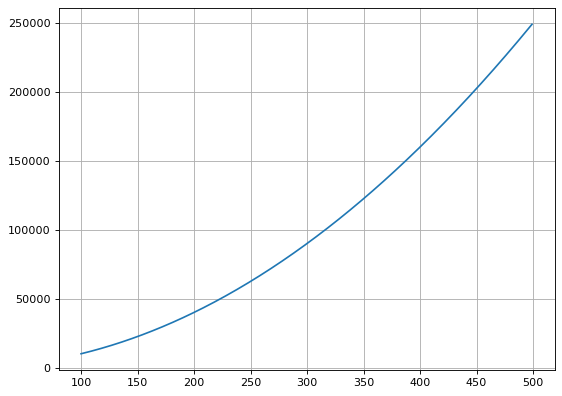

In [35]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(x)
ypoints = np.array(y)
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(xpoints, ypoints)
plt.grid()
plt.show()

In [22]:
ypoints

array([[100, 101, 102, ..., 497, 498, 499],
       [100, 101, 102, ..., 497, 498, 499],
       [100, 101, 102, ..., 497, 498, 499],
       ...,
       [100, 101, 102, ..., 497, 498, 499],
       [100, 101, 102, ..., 497, 498, 499],
       [100, 101, 102, ..., 497, 498, 499]])

In [43]:
x = list()
for V in range(100, 500):
    x.append(V)

In [56]:
import math
y = list()
for i in x:
    x_2 = math.log(i, 10)*(i + i*(i-1)/2)
    y.append(x_2)
y

[10100.0,
 10324.259396354391,
 10551.176702265351,
 10780.7561755209,
 11013.00203257134,
 11247.918449324205,
 11485.509561916511,
 11725.77946746514,
 11968.732224796184,
 12214.371855154037,
 12462.702342890963,
 12713.72763613786,
 12967.451647456906,
 13223.878254476705,
 13483.011300510576,
 13744.854595158587,
 14009.411914893866,
 14276.687003633755,
 14546.683573296306,
 14819.405304342668,
 15094.855846305754,
 15373.038818305717,
 15653.957809552634,
 15937.616379836847,
 16224.018060007322,
 16513.166352438442,
 16805.064731485618,
 17099.716643930016,
 17397.125509412796,
 17697.2947208592,
 18000.22764489271,
 18305.927622239735,
 18614.397968124948,
 18925.6419726577,
 19239.662901209682,
 19556.463994784157,
 19876.048470376947,
 20198.419521329513,
 20523.58031767426,
 20851.534006472342,
 21182.283712144206,
 21515.832536793005,
 21852.18356052117,
 22191.33984174027,
 22533.304417474403,
 22878.080303657203,
 23225.67049542279,
 23576.077967390655,
 23929.3056739447

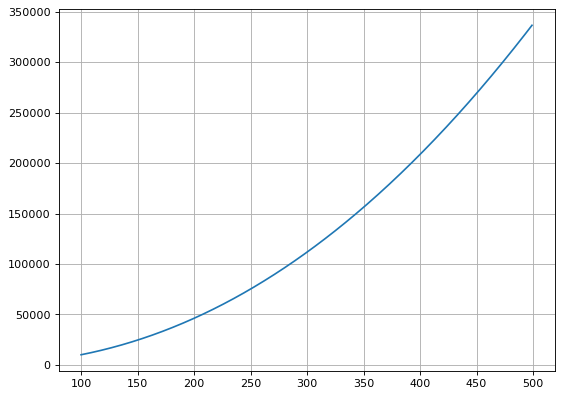

In [58]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(x)
ypoints = np.array(y)
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(xpoints, ypoints)
plt.grid()
plt.show()

